<a href="https://colab.research.google.com/github/onni-Q/lecture_notebooks/blob/main/Week2_Lecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis with Pandas

This week shows you how to get started with data analysis with Python and the Pandas library. We will learn how to open and inspect data files, how to prepare our data for analysis, and how to apply different kinds of methods to our data to try and create knowledge from it.

## What is Pandas?

For this session, we will use the [Pandas library](https://pandas.pydata.org/). Pandas is a very widely used and powerful library with all kinds of methods for data analysis, manipulation, and visualization.

> *A library is basically a set of pre-written code that you can load and make use of to perform specific tasks. By using libraries, coders do not need to write all the code from scratch, specifically for common or recurring tasks such as loading files, performing some computations, applying a model to some data, etc. In that case, it is easier to load a library that already has all these functions written in an optimized manner.*

We are going to use it to load some data from a CSV file. But first, we import the Pandas library, and make its elements available later under the abbreviation 'pd'.

In [ ]:
import pandas as pd
pd.options.mode.copy_on_write = True      # we are adding this option to change how Pandas creates new dataframes from existing ones - this will be the default in the future

### What is a CSV file?

The two most common data formats to store data in are CSV and JSON. If you are not familiar with these, take a look at:

*  CSV (https://www.howtogeek.com/348960/what-is-a-csv-file-and-how-do-i-open-it/)
* JSON (https://www.w3schools.com/whatis/whatis_json.asp)

We will mainly work with CSV here.

CSV (Comma Separated Values), or variants, such as TSV (Tab Separated Values) are the most often used file type for structured data. A CSV file is similar to an Excel or Google Docs spreadsheet, but more limited in markup and functionality (e.g. you cannot store Excel functions). You can actually also open it in Excel on your computer, or as a text file - although it will not be as pretty to look at. Basically, a CSV is just a text file in which individual entries correspond to lines, and columns are separated by a comma.

To work with the data stored in in a CSV file, we are going to load it into a DataFrame.



### What is a DataFrame?


What is a `pandas.DataFrame`?

A DataFrame is a two-dimensional, table-like data structure that organizes data into labeled columns (called Series) and indexed rows. Each column in a DataFrame is a Series, and all columns share the same index, meaning their entries are aligned by row.

You can think of a DataFrame as an in-memory spreadsheet that you can manipulate programmatically, or as a table where each row is an observation and each column represents a variable.

Depending on whether we use Jupyter or just standard Python for printout, a DataFrame may look a little different.

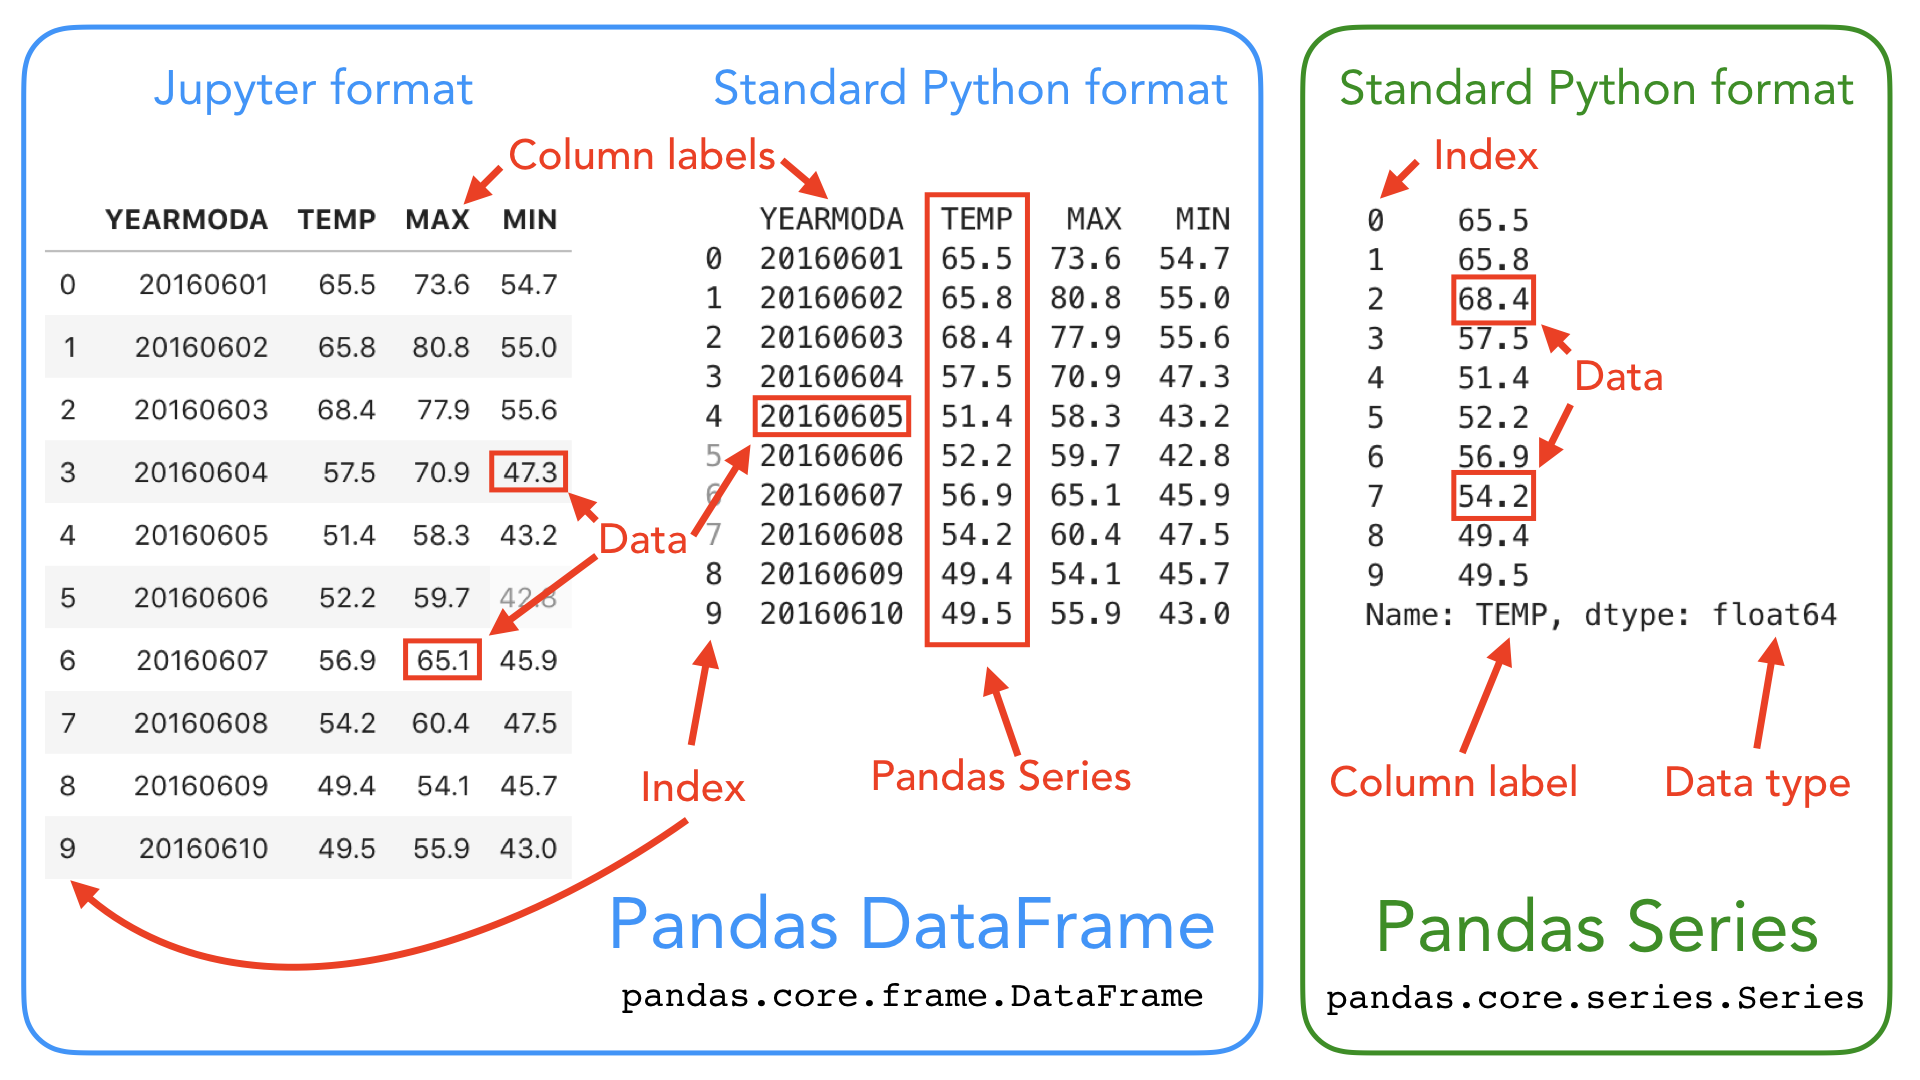

In contrast, a Python list is a one-dimensional, ordered collection of items. It can hold sequences of values but lacks the structure and analytical capabilities of a DataFrame. If a list is like a single column of data, a DataFrame is like an entire spreadsheet with multiple columns and labeled axes.

## Opening, inspecting, and cleaning

While you can, of course, work directly in Pandas all of the time, it is often useful to open a CSV in a desktop application like Excel or in Google Sheets to see what's in the data, navigate, etc. But large CSV files can be too much for these applications. [Modern CSV](https://www.moderncsv.com/) is a very fast viewer application for all major operating systems that can open 10M+ row spreadsheets without too much trouble.

Today, we will be working with data from TikTok, collected with the [Zeeschuimer](https://github.com/digitalmethodsinitiative/zeeschuimer) browser extension (if you want to try it out yourself, use [Zeehaven](https://publicdatalab.github.io/zeehaven/) to convert into CSV). You can find the data in our shared folder, so we first need to connect to Google Drive.

In [ ]:
# Mount your Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

We collected TikTok posts on, of course, [the rapture](https://en.wikipedia.org/wiki/Rapture).

To load the file, replace the path below with the actual path to the CSV file in *your* Google Drive. The easiest way (I know of) is to use the folder icon in the left sidebar, navigate to your file, and then click "copy path" on the three dots that appear when you hover over the file.

In [ ]:
file_path = ''

Reading in a csv with pandas is easy. We call the `pd.read_csv()` function with the file path as argument. (Pandas takes care of opening and closing the file, so a `with` statement is not needed.) The contents of the csv file are then read in a Pandas DataFrame object. We can store this in the variable `df`.

There are [other data import functions in pandas](https://pandas.pydata.org/docs/user_guide/io.html), for example, an `pd.read_excel()` option to read spreadsheets in .xls or .xlsx.

### Inspecting the data

We can display the data via the `print()` (in Python format) or `display()` (in Jupyter format) function anywhere in the code, but just calling the variable directly in the last line of a Jupyter Notebook cell gives back a nicely formatted table with the first and last 5 rows of the file.

The `head()` and `tail()` methods allow us to display as many lines from the beginning or end as we want, with a default of five.

We can also sort the dataframe with something like `df.sort_values('plays', ascending=False)` to already get a glance at the data in a more specific way. We can combine this with `head()`.

The `.info()` method can also be informative. It gives you information about a dataframe:
- how much space does it take in memory?
- what is the datatype of each column?
- how many records are there?
- how many `null` values does each column contain?

### Cleaning the data

The first step of data analysis is called data cleaning. In this step, we go through the data and prepare it for analysis by removing rows with missing or incorrect data, adjusting data types if necessary, etc. Basically, we are making sure the dataset does not have any issues that will break or influence the results of the analysis.

Note: There is no universal correct way of cleaning a dataset. Rather, it depends on what type of analysis we aim to do. Very often, we discover problems as we go along and then come back to the start to fix it.

Let's check for missing values first. This may trip us up further down since some functions don't like having missing values. We can see which columns have the most missing values using `df.isna().sum().sort_values(ascending=False)`:

Here you can already see the power of pandas at work; we just 'chained' three different functions to give us a sense of the data, which would otherwise require many more lines of code.

We could drop 'useless' columns if they have more than 10 missing values with `df = df.dropna(axis=1, thresh=10)`. But then the columns are gone from our datafrome. If we change our minds, we have to load the data again.

Pandas automatically interprets which datatypes are used in the file, but this is not always correct. Especially if you have empty fields in the DataFrame, any other integers get interpreted as float. Every column has one datatype. You can check them with `df.info()` (like above) or `df.dtypes`.

The `object` type is a string in this file, `int64` is an integer.

Notice that with our TikTok file, the column `timestamp` is an object? That's not good if we want to do any kind of temporal analysis on it. So let's convert it:

In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

If you run `df.info()` again, this should be `datetime64[ns]` now (with nanosecond precision, so we can time those rapture memes with extra accuracy). Let's check for the `timestamp` row specifically.

In [ ]:
df['timestamp'].info()

## Selecting, deriving, and filtering

We often need to access only specific parts of our DataFrame, or only work with a subsection of the data.

You can select a single column by calling this column name as if the DataFrame was a dictionary. A single column from a DataFrame returns a `Series` object, which we can check with `type()`.

In [ ]:
print(type(df['body']))
print(type(df))
df['body']

We can also call multiple column names by specifying a list, e.g., `['author_full','body']`.

We can use this to create a new DataFrame with fewer columns. For example, when we are working with our TokTok data, do we really need all the 36 columns?

So we are going to create a new DataFrame with a selection of columns to make things a bit less cumbersome for us. We could overwrite the original DataFrame, but it's often a good idea to keep the 'original' intact. From now on, we'll work on `df_selection`, where we'll only keep the columns `id`,`author`,`author_likes`,`author_followers`,`author_videos`,`body`,`timestamp`,`tiktok_url`,`music_name`,`music_author`,`likes`,`comments`,`shares`,`plays`,`hashtags`, and`effects`.

In [ ]:
df_selection = df[['id','author','author_likes','author_followers','author_videos','body','timestamp','tiktok_url','music_name','music_author','likes','comments','shares','plays','hashtags','effects']]
df_selection

### Deriving new metrics

We can also derive new variables from existing ones. For example, how much direct engagement (likes + comments + shares) is there in relation to plays? If we had 10 likes, 10 comments, 10 shares, and 100 plays, we could do 10 + 10 + 10 / 100 = 0.3.  We can multiply the result by 100 for better readability. The more views, the lower the ratio becomes. A higher ratio indicates more 'active' engagement in relation to 'passive' plays.

Let's create a new column with that information and print it out with `df_selection.sort_values('engagement_ratio', ascending=False).head()`.

In [ ]:
df_selection['engagement_ratio'] =

Another thing that we could do is make a distinction between videos that use a sound template and those that use an 'original sound'. So we are going to create a new column `music_type` that is based on an existing one (`music_name`).

We could do this by declaring a function, or by using Python's `lambda` syntax.

> *A function (or method) is basically a piece of code you can reuse whenever you need it to do something specific. Functions are helpful because they save us from having to rewrite the same code over and over, which helps keep the code organized. You start a function with the `def` keyword, give it a name, and add any inputs ('parameters') it needs to work. With custom functions, we can automate repetitive tasks, break down complex operations, and make the whole code easier to read and manage.*

Here's an example on how you would create your own function, in this case to return a music type of 'original sound' or 'template' depending on whether the input is 'original sound'. The first part of the code creates the function. The second one makes use of it (or 'calls' it). I also added the same thing in 'lambda' syntax as an alternative, so you can see how this looks.

Let's check our new data with `df_selection['music_type'].tail()`.

In [ ]:
def classify_music_type(music_name):
    if music_name == 'original sound':
        return 'original sound'
    else:
        return 'template'

df_selection['music_type'] = df_selection['music_name'].apply(classify_music_type)

# df_selection['music_type'] = df_selection['music_name'].apply(lambda x: 'original sound' if x == 'original sound' else 'template')

df_selection['music_type'].tail()

### Filtering the data

We can also select rows based on specific characteristics, for example, the author of a video. This is done through `.loc`. This works by asking: "Give me all the locations (=rows) for which a value in a specified column is equal to this value". Try this: `df_selection.loc[df_selection['author'] == 'itsnickholiday']`.

We can access the same columns in different ways using `.loc` (with labels) or `.iloc` (with integers).

In [ ]:
df_selection.loc[0:3, ['author', 'likes']]
df_selection.iloc[0:3, [1, 10]]

DataCamp has a [great overview](https://www.datacamp.com/tutorial/loc-vs-iloc) of how to use `iloc` and `loc`.

We can also filter based on numerical values, for example, with `df_selection[df_selection['comments'] > 20000]`.

We can also search for specific text pieces with this syntax: `df_selection[df_selection['hashtags'].str.contains('raptureready', na=False)]`.

The `na=False` argument ensures that rows with missing values in the 'hashtags' column are not included in the result. If you remove it, you get an error.

We can also filter by more than one condition at the same time using the '&' operator.

In [ ]:

len(df_top_raptureready)

## Statistics and data analysis
Now that we worked on our DataFrame and got to know it a bit, we can use pandas to make statistical analyses and visualizations.

Check out the pandas documentation on [summary statistics](https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html) and [visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) for lists of functions that can come in handy.

Scribbr has a nice overview of [descriptive statistics](https://www.scribbr.com/statistics/descriptive-statistics/).

The [Data Visualization Catalogue](https://datavizcatalogue.com/) and the [Data Viz Project](https://datavizproject.com/) are great repositories for information visualization types and when to use them.



### Quantitative variables

Quantitative variables are part of most datasets and we can use them to describe our 'population' (in this case TikTok videos). We can set (and reset) the numerical fomat used for easier readability. By default, Pandas uses scientific notation.

Let's start with the very useful `describe()` function on our `df_selection` DataFrame.

In [ ]:
pd.options.display.float_format = '{:.0f}'.format
# pd.options.display.float_format = None              # To reset the option


 The `describe()` functions returns another DataFrame with some descriptive statistics, such as the number of entries (count), the mean, the standard deviation, minimum and maximum values, and the 25th, 50th (=median), and 75th percentiles.

 We could also access these values individually, which is useful when we want to use them in other calculations or for visualization. Let's start with `.max()`.

---

Let's do `.min()`.

Some of these calculations are delegated to `NumPy`, another Python library that does very fast numerical calculation and replies with a formatted number ('np.float64'). But we can basically ignore this.

Let's try `.mean()`.

You can also apply these operations to multiple columns at once. You get a `Series` object back. Let's do a `.mean()` on `['plays','likes']`.

Other functions that can be used are for instance `.median()`, `.std()` and `.sum()`.

Let's do a .sum() on these columns: ['plays', 'likes', 'comments'].

#### Correlation

A very useful way to analyze relationships between quantitative variables is Correlation, which measures how strongly two variables change together. A positive correlation means that when one variable increases, the other tends to increase as well. A negative correlation means that when one goes up, the other tends to go down. If the correlation is close to zero, there is no clear relationship between them.

The correlation coefficient ranges from –1 to +1, where +1 indicates a perfect positive relationship, –1 a perfect negative one, and 0 no relationship at all.

Pandas has the `.corr()` function to calculate correlations: `df_selection['likes'].corr(df_selection['plays'])`.

In [ ]:
correlation

Likes and plays correlate almost perfectly.

We can also calculate correlations between all numerical (!) variables and display them as a handy correlation matrix with the [matplotlib](https://matplotlib.org/) and [seaborn](https://seaborn.pydata.org/) visualization libaries. Seaborn is built on matplotlib and provides some nicer and easier to use visualization options.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_selection_num = df_selection.select_dtypes(include='number')       # we select only the columns that contain numbers

plt.figure(figsize=(10, 6))
sns.heatmap(df_selection_num.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

We can also look at the relationship between two variables as a scatter plot. That allows us to see the overall trend, but also whether there are significant outliers.

We can also add some labels to our chart.

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='plays', y='likes', data=df_selection, scatter_kws={'alpha':0.2})
plt.title('Scatterplot of Likes vs Plays with Trendline')
plt.xlabel('Plays')
plt.ylabel('Likes')
plt.show()

### Categorical variables and grouping

Categorical variables represent groups or categories rather than numerical values. For example, we created a variable 'music_type' for each videos, which can be either 'original sound' or 'template'.

The `.groupby()` function in Pandas can be used to merge our data into groups based on the values in one or more columns, so we can perform calculations on each group separately. Think of it as telling Pandas: "Group my data by this column, then calculate something for each group." This is very similar to the 'pivot table' function in spreadsheet software.

In [ ]:
df_selection.groupby('music_type')

Without any additional command, the `.groupby()` function does not give back something nicely formatted or interpretable. It's just another Python object. The object returned by `.groupby()` is a DataFrameGroupBy, not a normal DataFrame.

So let's add `.size()` to see how many videos there are per 'music_type'.

We could also apply statistical functions, like `.mean()` to find out whether videos with original sound or templates get more likes on average.

We can use groupby() to create a new dataframe that contains one authorname per row and the sum of all of their plays: `df_selection.groupby('author')['plays'].sum().sort_values(ascending=False)`.

In [ ]:

df_authors

If we want to, we could use a for loop on this new DataFrame. We currently do not need this, but we should remember that we can still apply some of the basic programming concepts to DataFrame.

In [ ]:
for author, plays in df_authors.items():
    print(author, plays)

Using the `.agg()` function, we can calculate more than one value based on the .`groupby()`. For example, instead of having only the `sum` of plays, we could also add the number of videos per author with `size`. I am formatting this accross several lines to make it more readable.

In [ ]:
df_selection.groupby('author').agg(
      plays_sum=('plays', 'sum'),
      count=('plays', 'size')
    ).sort_values(by='count', ascending=False)

We can also use the matplotlib and seaborn libraryies to visualize categorical variables.

In [ ]:
plt.figure(figsize=(10, 3))
df_selection.groupby('music_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.show()

There are tons of parameters, functions, methods, transformations you can use on DataFrames and also on this plotting function. Luckily, plenty of guides and examples can be found on the internet. Here is another example that shows the distribution of comments per music_type as a violin plot.

In [ ]:
plt.figure(figsize=(10, 3))
sns.violinplot(df_selection, x='comments', y='music_type', inner='box', palette='Dark2', hue='music_type')
plt.show()

In our TikTok data, we also have columns that have more than one value, like the 'hashtags' column. Let's look at some values: `df_selection['hashtags'].tail(3)`.

In order to count these, we have to split them up, which gives us a Series instead of a DataFrame. The `explode()` function gives every value in a cell's list its own row.

In [ ]:
se_tags = df_selection['hashtags'].dropna().str.split(',').explode()
se_tags

In [ ]:
plt.figure(figsize=(4, 6))
se_tags.groupby(se_tags).size().sort_values(ascending=False).head(10).sort_values().plot(kind='barh', color=sns.palettes.mpl_palette('viridis', 10))
plt.show()

### Time Series

We can also use `.groupby()` to work with dates. Let's look at posts over time.

In [ ]:
videos_over_time_weekly = df_selection.groupby(df_selection['timestamp'].dt.to_period('W')).size()

# Reindex to fill missing weeks with 0
all_weeks = pd.period_range(start=videos_over_time_weekly.index.min(), end=videos_over_time_weekly.index.max(), freq='W')
videos_over_time_weekly = videos_over_time_weekly.reindex(all_weeks, fill_value=0)

plt.figure(figsize=(12, 6))
videos_over_time_weekly.plot()
plt.title('Number of Videos Over Time (Weekly, with missing weeks filled)')
plt.xlabel('Date')
plt.ylabel('Number of Videos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Writing data back into a file

As a bonus for this week: it can be useful to safe our manipulated data (cleaned, with new variables, etc.) back into a file.

We can use functions like `.to_csv()` or `.to_excel` to save a DataFrame. Again, no `with` statement needed, just a file path (and an encoding).

In [ ]:
df_selection.to_csv('/content/drive/MyDrive/tiktok_export.csv', encoding='utf-8')

In [ ]:
df_selection.to_excel('/content/drive/MyDrive/tiktok_export.csv.xlsx')

You need to specify `index=False` if you want to prevent a standard index (0,1,2,3...) to be saved in the file as well.

In [ ]:
df_selection.to_csv('/content/drive/MyDrive/tiktok_export.csv', encoding='utf-8', index=False)

Open the contents in Excel, LibreOffice Calc, or another program to read spreadsheets!